<a href="https://colab.research.google.com/github/kouseizack/nlp_basics/blob/master/nlp_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/My Drive/nlp_basics

/content/drive/My Drive/nlp_basics


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk #NLTK(Natural Language Toolkit)
from nltk.corpus import stopwords #NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
from nltk.tokenize import word_tokenize# To tokenize words
import re
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [18]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
print (data_train.shape)
print (data_test.shape)

(159571, 8)
(153164, 2)


In [19]:
label = []
for ind in data_train.index:
  val = 0
  for i , category in enumerate(data_train.columns.values[2:]):
    val += (2**i)*data_train[category][ind]
  label.append(val)
print (len(label))
'''data_train['label'] = label
print (data_train.head(5))'''

159571


"data_train['label'] = label\nprint (data_train.head(5))"

Data Visulalization

In [20]:
categories = list(data_train.columns.values)
categories = categories[2:]
print (categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [21]:
count_per_category = [sum(data_train[y]) for y in data_train.columns.values[2:]]
count_per_category

[15294, 1595, 8449, 478, 7877, 1405]

Text(0, 0.5, 'Occurrence')

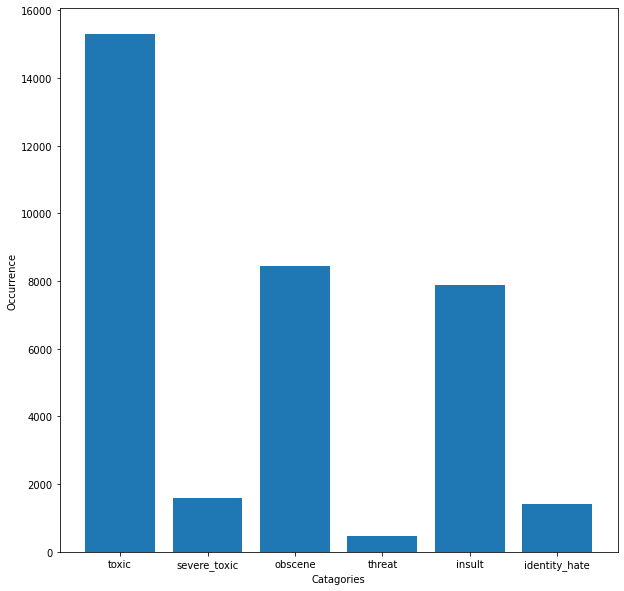

In [22]:
plt.figure(figsize = (10, 10))
plt.bar(np.arange(len(count_per_category)),count_per_category)
plt.xticks(np.arange(len(count_per_category)), categories)
plt.xlabel('Catagories')
plt.ylabel('Occurrence')

In [23]:
train_sample = data_train.loc[np.random.choice(data_train.index, size=70000)]
train_sample.shape
test_sample = data_test.loc[np.random.choice(data_test.index, size=70000)]
test_sample.shape

(70000, 2)

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=50000)

print (train_sample.shape)

total_comments = train_sample['comment_text'].values
tokenizer.fit_on_texts(total_comments)
X_train , X_test , Y_train , Y_test = train_test_split(train_sample['comment_text'].values , train_sample.iloc[: , 2:] ,random_state=42, test_size=0.30, shuffle=True)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = max([len(s.split()) for s in total_comments])

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000, 8)
(49000, 1354) (49000, 6)
(21000, 1354) (21000, 6)


Data pre-processsing : 


In [0]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha_numer(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub("[^a-zA-Z0-9]"," ", word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [26]:
train_sample['comment_text'] = train_sample['comment_text'].str.lower()
test_sample['comment_text'] = test_sample['comment_text'].str.lower()

train_sample['comment_text'] = train_sample['comment_text'].apply(cleanHtml)
train_sample['comment_text'] = train_sample['comment_text'].apply(cleanPunc)
train_sample['comment_text'] = train_sample['comment_text'].apply(keep_alpha_numer)
print (train_sample.head())
print (train_sample['comment_text'])

                      id  ... identity_hate
99351   137767c9a0674013  ...             0
11393   1e23fab7b340810d  ...             0
323     00d08f350398a2b9  ...             0
122225  8dd8b38583ca6beb  ...             0
95004   fdfe37175faa97c3  ...             0

[5 rows x 8 columns]
99351     other comments were not much friendlier  russe...
11393     shouldnt this one be deleted its renamed to su...
323                                    to a convicted felon
122225                         creating talk page as needed
95004     are you going to teach me what language predom...
                                ...                        
42150     20  reminds me of the percentage of german you...
3829                          with aristocratic connections
115897    commercial websites are advised against as ext...
5699      november 2012 ignoring wp nor is a breach of w...
35232     arbitration enforcement please see wikipedia a...
Name: comment_text, Length: 70000, dtype: object


In [27]:
test_sample['comment_text'] = test_sample['comment_text'].apply(cleanHtml)
test_sample['comment_text'] = test_sample['comment_text'].apply(cleanPunc)
test_sample['comment_text'] = test_sample['comment_text'].apply(keep_alpha_numer)
test_sample.head()

,id,comment_text
36100,3bfdb815dca07562,pleae go to stormfront and show those bastards...
15687,1a5e06490b97583f,something for you style border 2px solid...
116743,c2cb6af9a71b4507,i think the latter version i e the current one...
85485,8e991ba464d80eb3,the material you and a lot of others posted mi...
111231,b996feab2b68d8ce,


Removing stop words from corpus

In [28]:
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words

train_sample['comment_text'] = [tokenizer.tokenize(sentences) for sentences in train_sample['comment_text']]
train_sample['comment_text'] = train_sample['comment_text'].apply(lambda x : remove_stopwords(x))

test_sample['comment_text'] = [tokenizer.tokenize(sentences) for sentences in test_sample['comment_text']]
test_sample['comment_text'] = test_sample['comment_text'].apply(lambda x : remove_stopwords(x))
print (train_sample["comment_text"])
print (test_sample["comment_text"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
99351     [comments, much, friendlier, russell, kirk, co...
11393             [shouldnt, one, deleted, renamed, sunday]
323                                      [convicted, felon]
122225                       [creating, talk, page, needed]
95004     [going, teach, language, predominates, catalon...
                                ...                        
42150     [20, reminds, percentage, german, youth, fight...
3829                            [aristocratic, connections]
115897     [commercial, websites, advised, external, links]
5699      [november, 2012, ignoring, wp, breach, wp, con...
35232     [arbitration, enforcement, please, see, wikipe...
Name: comment_text, Length: 70000, dtype: object
36100     [pleae, go, stormfront, show, bastards, ive, p...
15687     [something, style, border, 2px, solid, lightst...
116743    [think, latter, version, e, current, one, bett...


Lemmatizing the corpus


In [29]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text= [lemmatizer.lemmatize(i) for i in text]
    return lem_text 
train_sample['comment_text'] = train_sample['comment_text'].apply(lambda x : word_lemmatizer(x))
test_sample['comment_text'] = test_sample['comment_text'].apply(lambda x : word_lemmatizer(x))
print (train_sample['comment_text'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
99351     [comment, much, friendlier, russell, kirk, con...
11393             [shouldnt, one, deleted, renamed, sunday]
323                                      [convicted, felon]
122225                       [creating, talk, page, needed]
95004     [going, teach, language, predominates, catalon...
                                ...                        
42150     [20, reminds, percentage, german, youth, fight...
3829                             [aristocratic, connection]
115897       [commercial, website, advised, external, link]
5699      [november, 2012, ignoring, wp, breach, wp, con...
35232     [arbitration, enforcement, please, see, wikipe...
Name: comment_text, Length: 70000, dtype: object


In [30]:
import copy
train_sentences = train_sample['comment_text'].values.tolist()
test_sentences = test_sample['comment_text'].values.tolist()
total_sentences = copy.deepcopy(train_sentences)
total_sentences.extend(test_sentences)
print (train_sentences[0])

['comment', 'much', 'friendlier', 'russell', 'kirk', 'conservative', 'philosopher', 'groused', 'people', 'read', 'novel', 'fornicating', 'bit', 'used', 'single', 'quote', 'appropriate', 'wouldnt', 'mistaken', 'pov', 'however', 'would', 'still', 'like', 'note', 'edits', 'made', 'pov', 'thus', 'deserved', 'reverted', 'lgagnon']


In [31]:
from gensim.models import Word2Vec
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
w2v = Word2Vec(total_sentences, size=100, window=5, min_count=1, workers=4)
w2v.train(total_sentences,total_examples=len(total_sentences),epochs=10)
w1  = "edit"
print (w2v.wv.most_similar (positive=w1))

[('edits', 0.6691185832023621), ('htmlfourwaykey', 0.6465311646461487), ('wikipadida', 0.6448255181312561), ('gb0008237132gbgbxaimi', 0.5851326584815979), ('paine1776', 0.561846137046814), ('findingf', 0.5606018304824829), ('eois', 0.543807864189148), ('stateing', 0.5436743497848511), ('mattdocbrown', 0.5384588241577148), ('revert', 0.5313133001327515)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [32]:
import tensorflow.compat.v1 as tf
from keras.utils import to_categorical
tf.disable_v2_behavior()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [33]:
embedding_matrix = w2v.wv.vectors
vocab_size = len(embedding_matrix)
print (vocab_size)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, 
                           output_dim = 100,weights=[embedding_matrix] , 
                           input_length = maxlen, trainable=False))
model.add(tf.keras.layers.LSTM(units = 128 ,dropout = 0.2 , recurrent_dropout = 0.2))
model.add(tf.keras.layers.Dense(6 , activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

160799
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1354, 100)         16079900  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 16,197,922
Trainable params: 118,022
Non-trainable params: 16,079,900
_________________________________________________________________


In [34]:
model.fit(X_train, Y_train, batch_size = 64 , epochs=10, verbose=2 , validation_split=0.2)
# evaluate
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %f' % (acc*100))

Train on 39200 samples, validate on 9800 samples
Epoch 1/10
39200/39200 - 2547s - loss: 0.1464 - acc: 0.9613 - val_loss: 0.1427 - val_acc: 0.9634
Epoch 2/10
39200/39200 - 2466s - loss: 0.1430 - acc: 0.9630 - val_loss: 0.1429 - val_acc: 0.9634
Epoch 3/10
39200/39200 - 2504s - loss: 0.1426 - acc: 0.9630 - val_loss: 0.1355 - val_acc: 0.9634
Epoch 4/10
39200/39200 - 2485s - loss: 0.1130 - acc: 0.9644 - val_loss: 0.0919 - val_acc: 0.9729
Epoch 5/10
39200/39200 - 2481s - loss: 0.0920 - acc: 0.9715 - val_loss: 0.0829 - val_acc: 0.9739
Epoch 6/10
39200/39200 - 2645s - loss: 0.0838 - acc: 0.9740 - val_loss: 0.0786 - val_acc: 0.9751
Epoch 7/10
39200/39200 - 2738s - loss: 0.0787 - acc: 0.9752 - val_loss: 0.0762 - val_acc: 0.9756
Epoch 8/10
39200/39200 - 2633s - loss: 0.0753 - acc: 0.9762 - val_loss: 0.0760 - val_acc: 0.9763
Epoch 9/10
39200/39200 - 2638s - loss: 0.0726 - acc: 0.9768 - val_loss: 0.0724 - val_acc: 0.9760
Epoch 10/10
39200/39200 - 2566s - loss: 0.0697 - acc: 0.9776 - val_loss: 0.069